# Pokemon **

### Step 1. Importa las librerías necesarias

In [1]:
import pandas as pd
import seaborn as sns

### Step 2. Activa matplotlib de forma estática

In [2]:
%matplotlib inline

### Step 3. Lee 'pokemon.csv' de esta [url](https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv), lee la primera columna del csv como índice del DataFrame

In [4]:
pd.read_csv ('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')
pk = pd.read_csv ('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')

### Step 4. Mira las primeras filas del dataset para hacerte una idea de los datos cargados

In [6]:
pk.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Step 5. Haz un scatter plot con `lmplot()`, que es el método que pinta una regresión lineal
Pasa el DataFrame como argumento del método en el parámetro llamado `data`

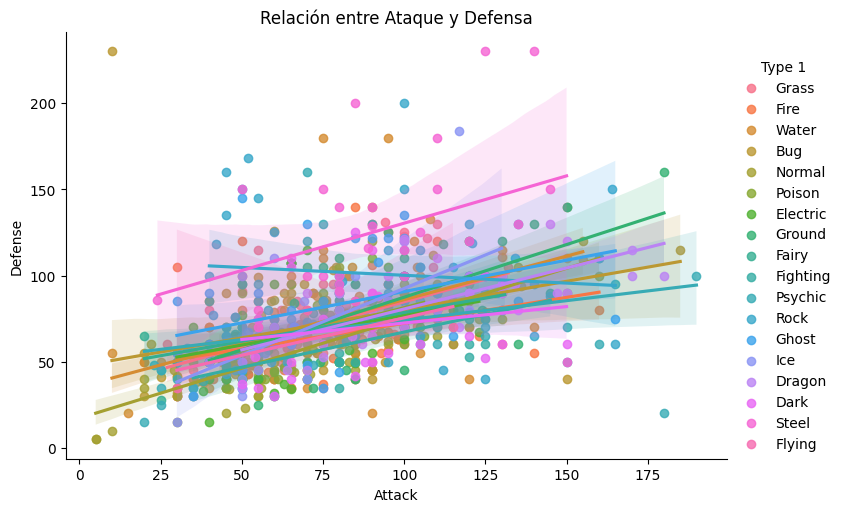

In [9]:
import matplotlib.pyplot as plt

sns.lmplot(data=pk, x="Attack", y="Defense", hue="Type 1", aspect=1.5)
plt.title("Relación entre Ataque y Defensa")
plt.show()

### Step 6. No queremos ver la línea recta de la regresión lineal.
Prueba a añadir fit_reg a falso

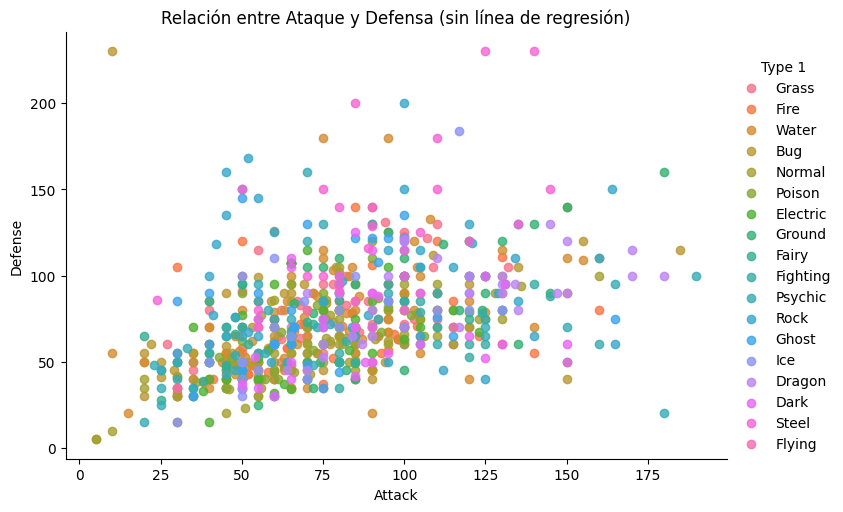

In [11]:
sns.lmplot(data=pk, x="Attack", y="Defense", hue="Type 1", fit_reg=False, aspect=1.5)
plt.title("Relación entre Ataque y Defensa (sin línea de regresión)")
plt.show()

### Step 7. Vamos a decir qué variable (columna del DataFrame) codifica los colores (hue)
Que el `hue` sea el Stage

In [13]:
print (pk.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [14]:
pk['Stage'] = pk['Generation'].apply(lambda x: f"Stage {x}")

print(pk[['Name', 'Generation', 'Stage']].head())

                    Name  Generation    Stage
0              Bulbasaur           1  Stage 1
1                Ivysaur           1  Stage 1
2               Venusaur           1  Stage 1
3  VenusaurMega Venusaur           1  Stage 1
4             Charmander           1  Stage 1


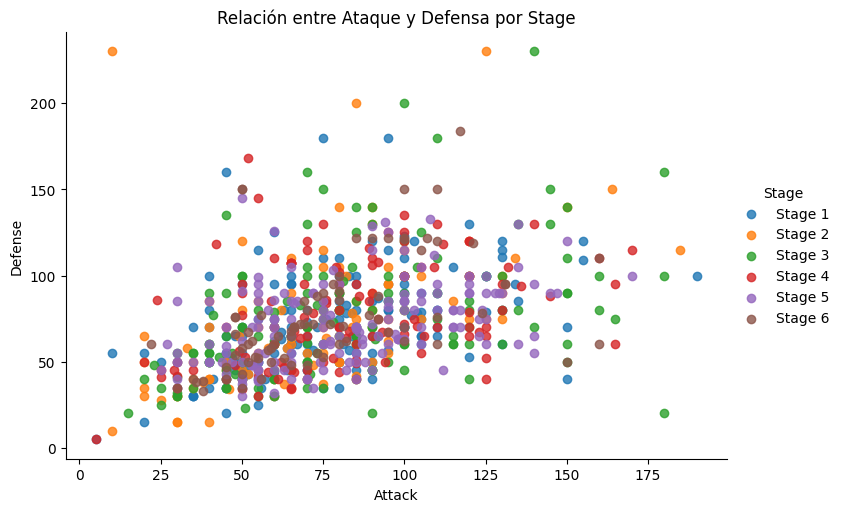

In [15]:
sns.lmplot(data=pk, x="Attack", y="Defense", hue="Stage", fit_reg=False, aspect=1.5)
plt.title("Relación entre Ataque y Defensa por Stage")
plt.show()

### Step 8. Limita el eje x entre 20 y 100

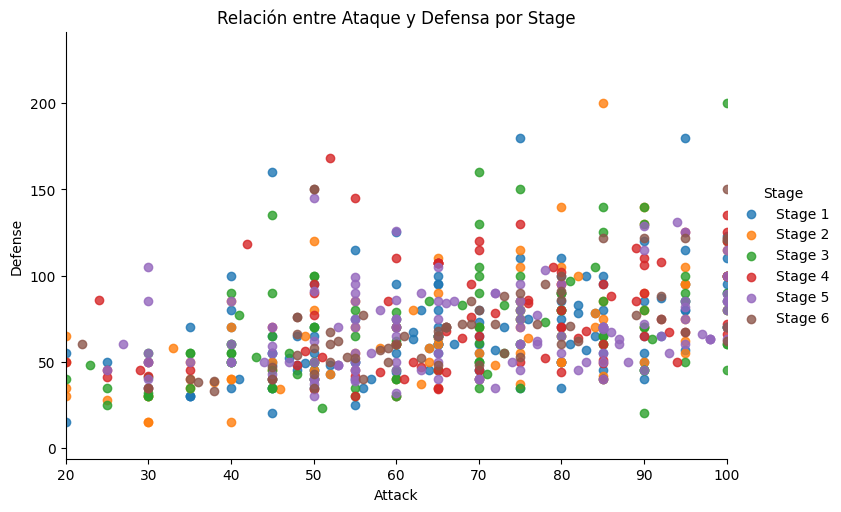

In [16]:
sns.lmplot(data=pk, x="Attack", y="Defense", hue="Stage", fit_reg=False, aspect=1.5)
plt.title("Relación entre Ataque y Defensa por Stage")

plt.xlim(20, 100)

plt.show()

### Step 9. Dibuja un diagrama de cajas con el dataframe

C:\Users\sr_tu\AppData\Local\Temp\ipykernel_10516\124528151.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numeric_columns_melted, x="Stat", y="Value", palette="Set3")


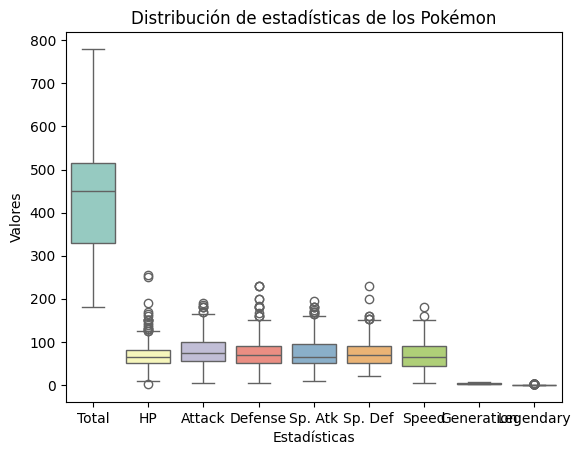

In [23]:
numeric_columns = pk[['Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Generation', 'Legendary']]

numeric_columns_melted = numeric_columns.melt(var_name="Stat", value_name="Value")

sns.boxplot(data=numeric_columns_melted, x="Stat", y="Value", palette="Set3")
plt.title("Distribución de estadísticas de los Pokémon")
plt.xlabel("Estadísticas")
plt.ylabel("Valores")
plt.show()

### Step 10. No nos interesan las columnas Total, Stage ni Legendary
Bórralos del DataFrame y vuelve a dibujar el diagrama de cajas

C:\Users\sr_tu\AppData\Local\Temp\ipykernel_10516\783528770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numeric_columns_melted, x="Stat", y="Value", palette="Set3")


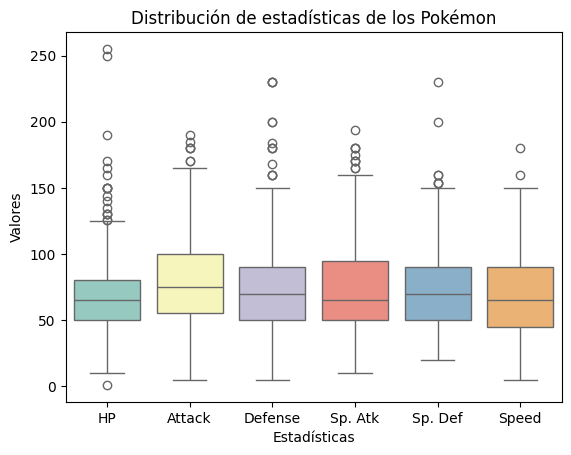

In [25]:
numeric_columns = pk[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

numeric_columns_melted = numeric_columns.melt(var_name="Stat", value_name="Value")

sns.boxplot(data=numeric_columns_melted, x="Stat", y="Value", palette="Set3")
plt.title("Distribución de estadísticas de los Pokémon")
plt.xlabel("Estadísticas")
plt.ylabel("Valores")
plt.show()

### Step 11. Mira cuántos 'Type 1' diferentes hay en el DataFrame

In [26]:
unique_types = pk['Type 1'].nunique()
print("Número de tipos diferentes en 'Type 1':", unique_types)

Número de tipos diferentes en 'Type 1': 18


### Step 12. Quédate del Dataframe solo con los 'Type 1' iguales a 'Grass', 'Fire' o 'Water'

In [28]:
filtered_df = pk.loc[pk['Type 1'].isin(['Grass', 'Fire', 'Water'])]

print(filtered_df.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary    Stage  
0       65       65     45           1      False  Stage 1  
1       80       80     60           1      False  Stage 1  
2      100      100     80           1      False  Stage 1  
3      122      120     80           1      False  Stage 1  
4       60       50     65           1      False  Stage 1  


### Step 13. Usa un estilo 'whitegrid'

C:\Users\sr_tu\AppData\Local\Temp\ipykernel_10516\958348095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pk, x="Type 1", y="Attack", palette="Set2")


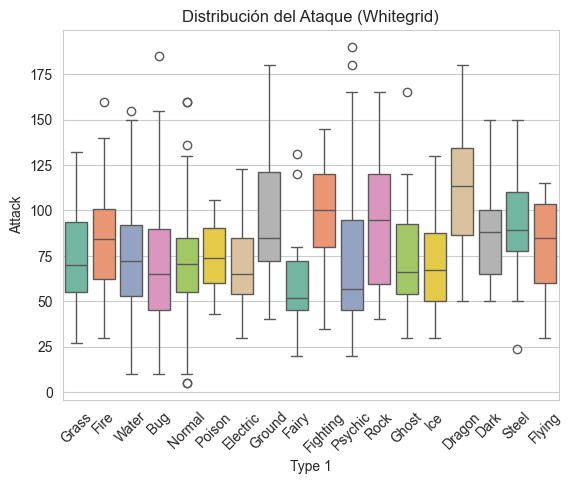

In [30]:
sns.set_style("whitegrid")

sns.boxplot(data=pk, x="Type 1", y="Attack", palette="Set2")
plt.title("Distribución del Ataque (Whitegrid)")
plt.xticks(rotation=45)
plt.show()

### Step 14. Pinta diagramas de violín con el DataFrame

C:\Users\sr_tu\AppData\Local\Temp\ipykernel_10516\1367543631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x="Type 1", y="Attack", palette="coolwarm")


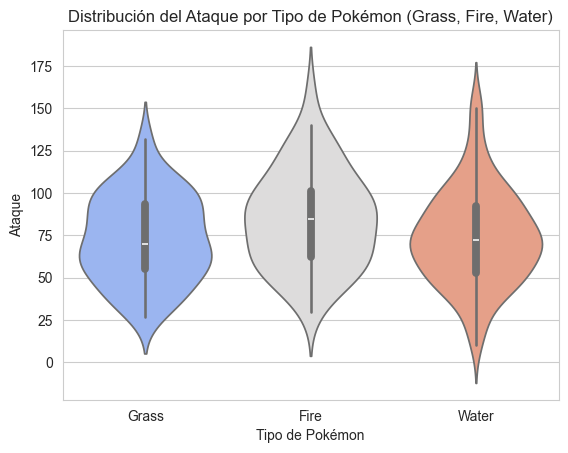

In [31]:
filtered_df = pk[pk["Type 1"].isin(["Grass", "Fire", "Water"])]

sns.violinplot(data=filtered_df, x="Type 1", y="Attack", palette="coolwarm")

plt.title("Distribución del Ataque por Tipo de Pokémon (Grass, Fire, Water)")
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Ataque")

plt.show()

### Step 15. Escribe una lista de colores con valores '#78C850', '#F08030',  '#6890F0'

In [32]:
colores = ['#78C850', '#F08030', '#6890F0']

### Step 16. Pinta de nuevo los diagramas de violín añadiendo esos colores en la paleta (palette)

C:\Users\sr_tu\AppData\Local\Temp\ipykernel_10516\4134737824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x="Type 1", y="Attack", palette= colores)


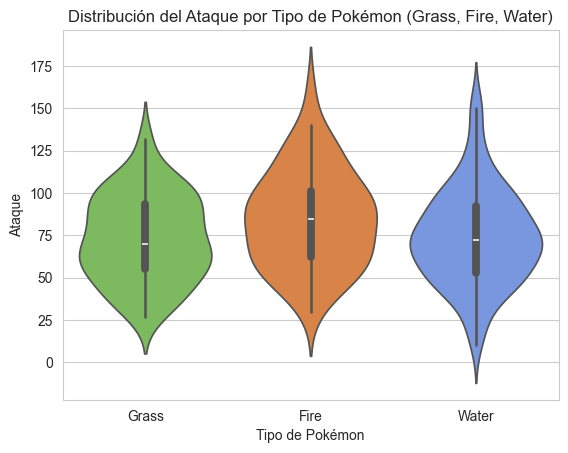

In [37]:
filtered_df = pk[pk["Type 1"].isin(["Grass", "Fire", "Water"])]

sns.violinplot(data=filtered_df, x="Type 1", y="Attack", palette= colores)

plt.title("Distribución del Ataque por Tipo de Pokémon (Grass, Fire, Water)")
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Ataque")

plt.show()

### Step 17. Con el diagrama de violín vemos la forma de la distribución, pero no sabemos si Grass tiene muchos puntos y Fire tiene muy pocos.
- Para ver esto, usamos el swarmplot.
- Pinta el último diagrama de violines pero con un swarmplot en lugar de un violin

C:\Users\sr_tu\AppData\Local\Temp\ipykernel_10516\35724399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=filtered_df, x="Type 1", y="Attack", palette=colores)


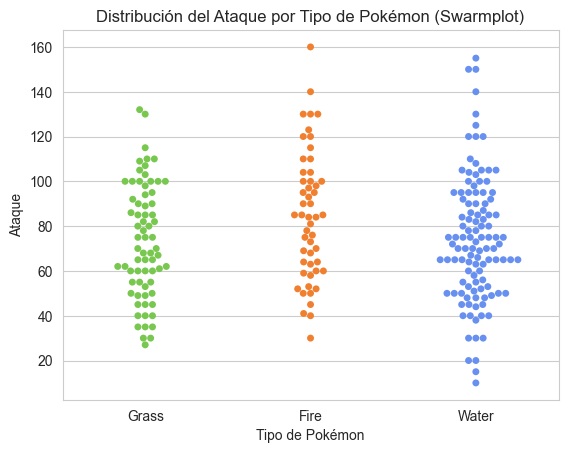

In [38]:
filtered_df = pk[pk["Type 1"].isin(["Grass", "Fire", "Water"])]

sns.swarmplot(data=filtered_df, x="Type 1", y="Attack", palette=colores)

plt.title("Distribución del Ataque por Tipo de Pokémon (Swarmplot)")
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Ataque")

plt.show()

### Step 18. Queremos ver los violines a la vez que los swarm, los podemos pintar juntos. 
Elimina los diagramas de caja dentro de los violines con el parámetro inner = None y pon una transparencia de 0.9

C:\Users\sr_tu\AppData\Local\Temp\ipykernel_10516\1420508991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x="Type 1", y="Attack", palette=colores, inner=None, alpha=0.9)


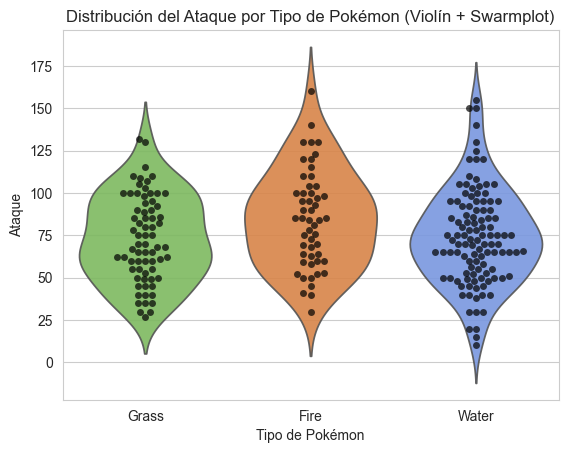

In [40]:
filtered_df = pk[pk["Type 1"].isin(["Grass", "Fire", "Water"])]

sns.violinplot(data=filtered_df, x="Type 1", y="Attack", palette=colores, inner=None, alpha=0.9)

sns.swarmplot(data=filtered_df, x="Type 1", y="Attack", color='k', alpha= 0.7)

plt.title("Distribución del Ataque por Tipo de Pokémon (Violín + Swarmplot)")
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Ataque")

plt.show()

### Step 19. Veamos la función melt() de pandas. Melt toma los valores de varias columnas y los junta todos en una misma columna nueva.
 Dado un DataFrame, [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) recibe varios parámetros:
 * qué columnas del DataFrame se quedan igual
 * qué nombres de columnas del dataframe pasan a ser una columna nueva
 * cómo queremos llamar esas nuevas columnas

Primero recuerda el Dataframe `df_grass_fire_water` con las primeras 5 filas

In [43]:
df_grass_fire_water = pk[pk["Type 1"].isin(["Grass", "Fire", "Water"])]

print(df_grass_fire_water.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary    Stage  
0       65       65     45           1      False  Stage 1  
1       80       80     60           1      False  Stage 1  
2      100      100     80           1      False  Stage 1  
3      122      120     80           1      False  Stage 1  
4       60       50     65           1      False  Stage 1  


In [44]:
melted_df = df_grass_fire_water.melt(id_vars=["Name", "Type 1"], var_name="Stat", value_name="Value")

print(melted_df.head())

                    Name Type 1 Stat Value
0              Bulbasaur  Grass    #     1
1                Ivysaur  Grass    #     2
2               Venusaur  Grass    #     3
3  VenusaurMega Venusaur  Grass    #     3
4             Charmander   Fire    #     4


### Step 20. Queremos dejar igual las variables 'Name' y 'Type 1'
Queremos añadir una columa nueva cuyos valores sean las columnas que queremos apilar y que se llame 'New Column'
    
Escribimos `df_grass_fire_water.melt(id_vars=['Name', 'Type 1'], value_vars=[...], var_name='New Column')`

In [48]:
melted_df = df_grass_fire_water.melt(
    id_vars=['Name', 'Type 1'], 
    value_vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 
    var_name='New Column', 
    value_name='Value'
)
print(melted_df.head())

                    Name Type 1 New Column  Value
0              Bulbasaur  Grass         HP     45
1                Ivysaur  Grass         HP     60
2               Venusaur  Grass         HP     80
3  VenusaurMega Venusaur  Grass         HP     80
4             Charmander   Fire         HP     39


### Step 21. Pintamos el swarmplot con el melted y entendemos la información

In [53]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

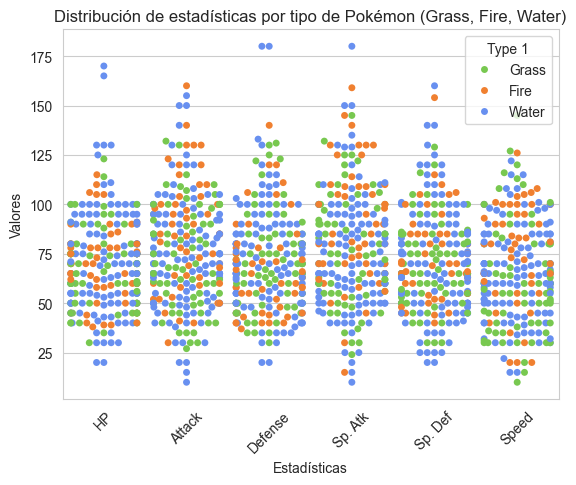

In [54]:
sns.swarmplot(data=melted_df, x="New Column", y="Value", hue="Type 1", palette=colores)

plt.title("Distribución de estadísticas por tipo de Pokémon (Grass, Fire, Water)")
plt.xlabel("Estadísticas")
plt.ylabel("Valores")
plt.xticks(rotation=45) 

plt.show()

### Step 22. Basándote en el gráfico anterior, define el tamaño de la figura en (10,6) (usa plt)
En el swarmplot añade el argumento dodge a True y usa la anterior paleta de colores Pokemon

Dodge en inglés es "esquivar", ¿qué diferencia ves?

Usando plt: 
  - fija el límite del eje Y entre 0 y 200
  - fija la leyenda con bbox_to_anchor en upper left. Pista: upper left es el código 2 y se usa el parámetro loc.


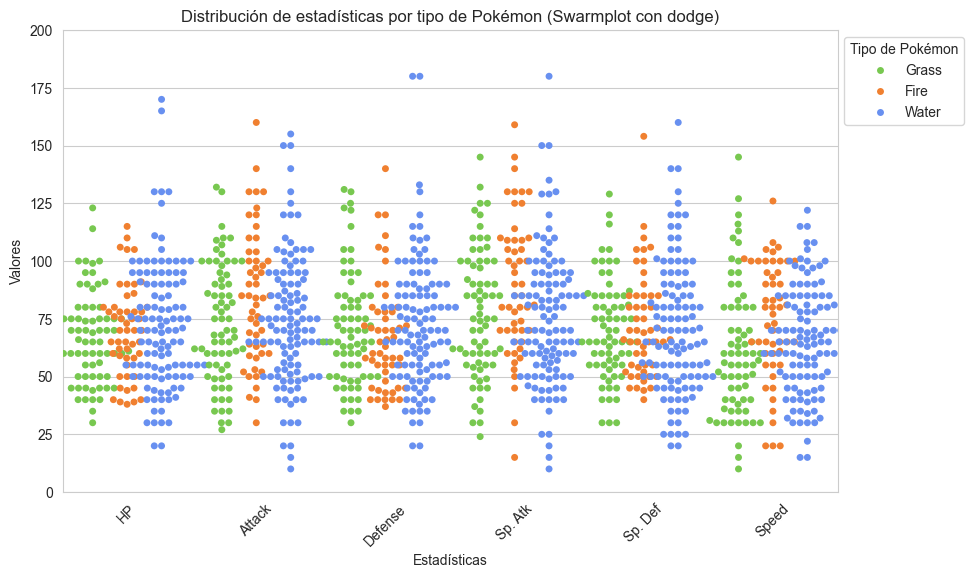

In [55]:
plt.figure(figsize=(10,6))

sns.swarmplot(data=melted_df, x="New Column", y="Value", hue="Type 1", palette=colores, dodge=True)

plt.ylim(0, 200)

plt.legend(title="Tipo de Pokémon", bbox_to_anchor=(1, 1), loc=2)

plt.title("Distribución de estadísticas por tipo de Pokémon (Swarmplot con dodge)")
plt.xlabel("Estadísticas")
plt.ylabel("Valores")
plt.xticks(rotation=45)

plt.show()

### Step 23. Mapas de calor
Calcula las correlaciones del primer DataFrame original df

Las correlaciones miden entre dos variables, si varío una, cuánto me varía la otra (cómo están de relacionadas)

In [62]:
mapa_heat = pk.select_dtypes(include=["number"]).corr()

print(mapa_heat)

                   #     Total        HP    Attack   Defense   Sp. Atk  \
#           1.000000  0.119813  0.097614  0.102298  0.094786  0.088759   
Total       0.119813  1.000000  0.618748  0.736211  0.612787  0.747250   
HP          0.097614  0.618748  1.000000  0.422386  0.239622  0.362380   
Attack      0.102298  0.736211  0.422386  1.000000  0.438687  0.396362   
Defense     0.094786  0.612787  0.239622  0.438687  1.000000  0.223549   
Sp. Atk     0.088759  0.747250  0.362380  0.396362  0.223549  1.000000   
Sp. Def     0.085817  0.717609  0.378718  0.263990  0.510747  0.506121   
Speed       0.010733  0.575943  0.175952  0.381240  0.015227  0.473018   
Generation  0.982516  0.048384  0.058683  0.051451  0.042419  0.036437   

             Sp. Def     Speed  Generation  
#           0.085817  0.010733    0.982516  
Total       0.717609  0.575943    0.048384  
HP          0.378718  0.175952    0.058683  
Attack      0.263990  0.381240    0.051451  
Defense     0.510747  0.015227    

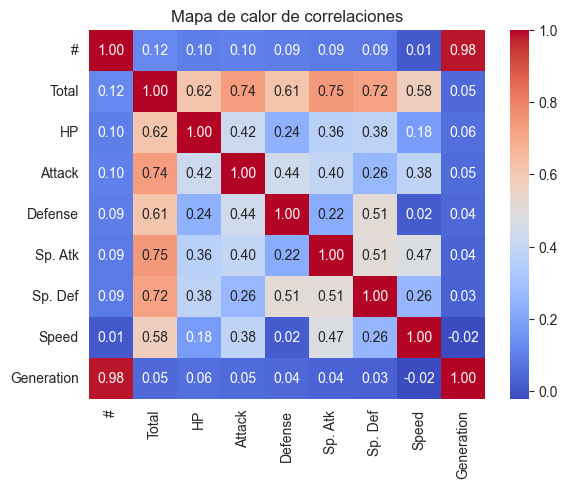

In [63]:
sns.heatmap(mapa_heat, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Mapa de calor de correlaciones")
plt.show()

### Step 24. Pinta el histograma y la densidad de probabilidad del nivel de defensa usando el DataFrame original

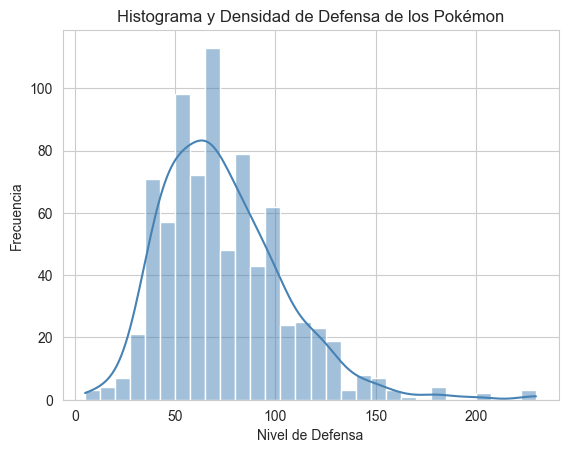

In [64]:
sns.histplot(data=pk, x="Defense", kde=True, bins=30, color="steelblue")

plt.title("Histograma y Densidad de Defensa de los Pokémon")
plt.xlabel("Nivel de Defensa")
plt.ylabel("Frecuencia")

plt.show()

### Step 25. Pinta un diagrama de barras de la columna 'Type 1' usando el DataFrame original
Usa un sns.countplot y plt.xticks para girar las etiquetas

C:\Users\sr_tu\AppData\Local\Temp\ipykernel_10516\1933423135.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pk, x="Type 1", palette= sns.color_palette('hls', len (pk['Type 1'].unique())))


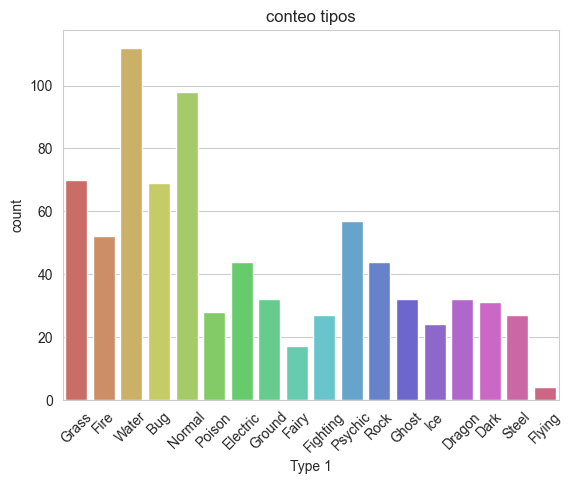

In [68]:
sns.countplot(data=pk, x="Type 1", palette= sns.color_palette('hls', len (pk['Type 1'].unique())))

plt.xticks(rotation=45)

plt.title("conteo tipos")
plt.xlabel("Type 1")
plt.ylabel("count")

plt.show()

### Step 26. Usa catplot con el DataFrame original. 
Muestra el valor de Defense según el 'Type 1', muestra un subplot para legendarios y otro para no legendariosy divide los colores según el Type 2

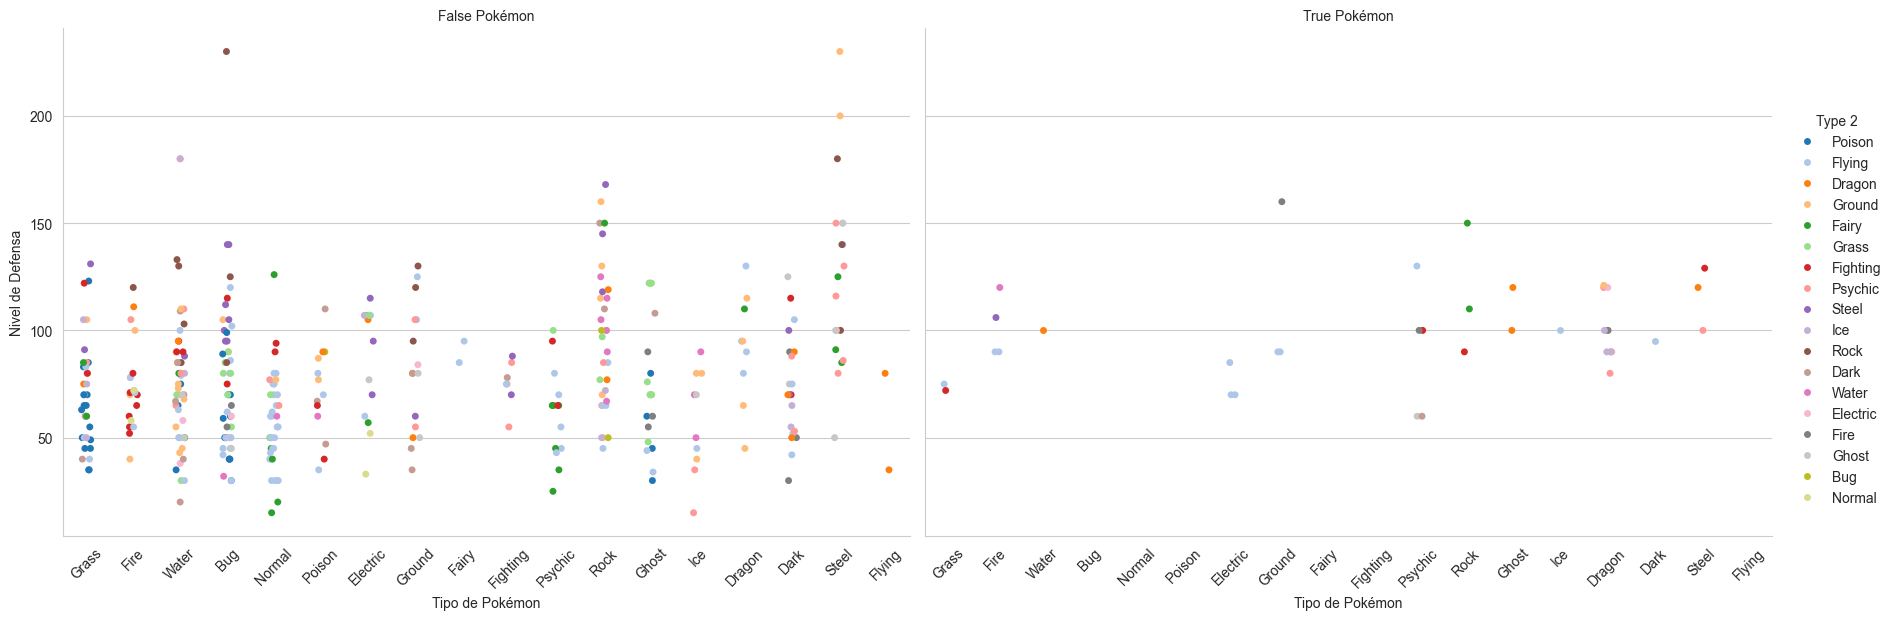

In [69]:
g = sns.catplot(
    data=pk, 
    x="Type 1", 
    y="Defense", 
    hue="Type 2", 
    col="Legendary",
    kind="strip",
    palette="tab20",
    height=6,
    aspect=1.5
)

g.set_titles("{col_name} Pokémon")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Tipo de Pokémon", "Nivel de Defensa")

plt.show()

### Step 27. Muestra una función distribución de probabilidad con kdeplot (curvas de nivel) de la defensa respecto al ataque.


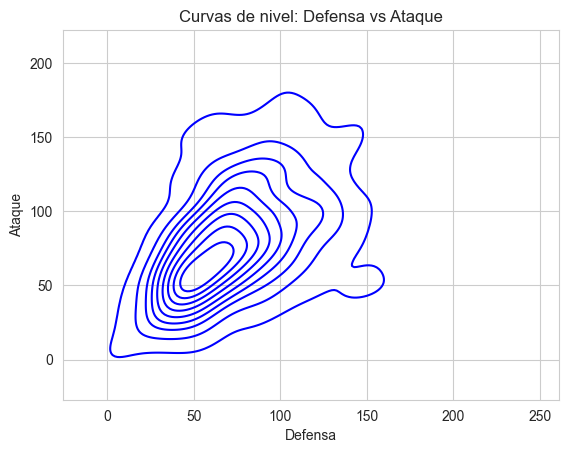

In [72]:
sns.kdeplot(data=pk, x="Defense", y="Attack", color="blue", fill=False)

plt.title("Curvas de nivel: Defensa vs Ataque")
plt.xlabel("Defensa")
plt.ylabel("Ataque")

plt.show()

### Step 29. Pinta una distribución de probabilidad conjunta, pintando la defensa respecto al ataque del DataFrame original

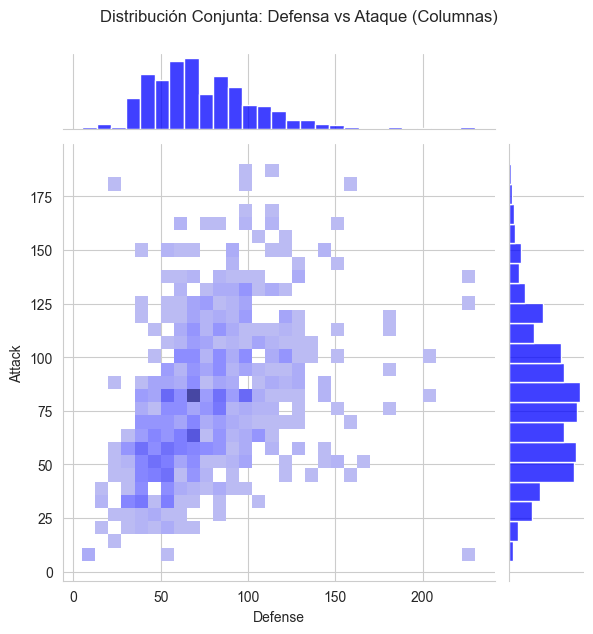

In [75]:
g = sns.jointplot(
    data=pk,
    x="Defense",
    y="Attack",
    kind="hist", 
    bins=30, 
    color="blue"
)

g.fig.suptitle("Distribución Conjunta: Defensa vs Ataque (Columnas)", y=1.05)

plt.show()